In [51]:
# Benchmarking PBMC dataset with simulated CNVs
# - CD14 monocytes: Chr6 loss, Chr22 loss
# - CD4 T cells: ChrX gain

adfile_path = "/Users/pythonpete/Downloads/CSCB-2025-Final/data/hesc_annotated.h5ad"

In [52]:
from cscb_methods import *

In [53]:
# Read file
adata = sc.read_h5ad(adfile_path)

In [54]:
#adata.var["start"] = np.NAN
#adata.var["end"] = np.NAN
#adata.var["chromosome"] = np.NAN
adata.var.columns = ["gene_ids"] + list(adata.var.columns[1:])
adata.var

,gene_ids,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
RP11-34P13.3,ENSG00000243485,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN
FAM138A,ENSG00000237613,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN
OR4F5,ENSG00000186092,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN
RP11-34P13.7,ENSG00000238009,False,False,8,0.000978,99.902189,8.0,8,False,4.454501e-04,-0.598873,-0.223582
RP11-34P13.8,ENSG00000239945,False,False,1,0.000122,99.987774,1.0,1,False,2.703626e-05,-1.517958,-3.605666
...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN
AC233755.1,ENSG00000275063,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN
AC240274.1,ENSG00000271254,False,False,93,0.011737,98.862942,96.0,88,False,6.073913e-03,-0.362178,0.647418
AC213203.1,ENSG00000277475,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN


In [66]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster
AAACCTGAGAATTGTG-1,2488,11469.0,401.0,3.496382,5000.0,43.595779,2488,11469.0,1,iPSC,aneuploid,2
AAACCTGAGACAATAC-1,3559,16891.0,669.0,3.960689,6438.0,38.114975,3559,16891.0,0,iPSC,aneuploid,1
AAACCTGAGACTACAA-1,2629,9423.0,377.0,4.000849,3390.0,35.975803,2629,9423.0,0,iPSC,diploid,0
AAACCTGAGACTTTCG-1,5118,32728.0,1597.0,4.879614,12402.0,37.894157,5118,32728.0,1,iPSC,aneuploid,2
AAACCTGAGGCGTACA-1,2515,10700.0,476.0,4.448598,4417.0,41.280373,2515,10700.0,1,iPSC,aneuploid,2
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCATGCAAC-1,3500,19690.0,807.0,4.098527,9161.0,46.526154,3500,19690.0,1,iPSC,aneuploid,2
TTTGTCATCCACTCCA-1,2404,9304.0,433.0,4.653913,3774.0,40.563198,2404,9304.0,0,iPSC,diploid,0
TTTGTCATCTCTTGAT-1,3441,16482.0,596.0,3.616066,6164.0,37.398373,3441,16482.0,0,iPSC,aneuploid,1
TTTGTCATCTGTTTGT-1,3065,15306.0,624.0,4.076833,6725.0,43.937019,3065,15306.0,1,iPSC,aneuploid,2


In [55]:
ref = "/Users/pythonpete/Downloads/PBMC_simulated_cnas_041025.h5ad"
ref_ad = sc.read_h5ad(ref)
ref_ad

AnnData object with n_obs × n_vars = 10309 × 20104
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'cell_type', 'simulated_cnvs'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'chromosome', 'start', 'end', 'strand'
    layers: 'counts'

In [56]:
ref_pos = ref_ad.var.loc[:, ["gene_ids", "chromosome", "start", "end", "strand"]]
ref_pos

,gene_ids,chromosome,start,end,strand
original_index,,,,,
AL627309.1,ENSG00000238009,NaN,NaN,NaN,NaN
AL627309.3,ENSG00000239945,1,89551.0,91105.0,-1.0
AL669831.5,ENSG00000237491,1,778739.0,810066.0,1.0
FAM87B,ENSG00000177757,1,817363.0,819842.0,1.0
LINC00115,ENSG00000225880,1,586945.0,827989.0,-1.0
...,...,...,...,...,...
AC011043.1,ENSG00000276256,GL000195.1,42939.0,49164.0,-1.0
AL592183.1,ENSG00000273748,GL000219.1,54224.0,83311.0,-1.0
AC007325.4,ENSG00000278817,KI270734.1,131494.0,137392.0,1.0


In [57]:
pos_overlap = pd.merge(adata.var, ref_pos, on="gene_ids", how="left")
pos_overlap

,gene_ids,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,chromosome,start,end,strand
0,ENSG00000243485,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
1,ENSG00000237613,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000186092,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
3,ENSG00000238009,False,False,8,0.000978,99.902189,8.0,8,False,4.454501e-04,-0.598873,-0.223582,NaN,NaN,NaN,NaN
4,ENSG00000239945,False,False,1,0.000122,99.987774,1.0,1,False,2.703626e-05,-1.517958,-3.605666,1,89551.0,91105.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33689,ENSG00000277856,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
33690,ENSG00000275063,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
33691,ENSG00000271254,False,False,93,0.011737,98.862942,96.0,88,False,6.073913e-03,-0.362178,0.647418,HG1343_HG173_HG459_PATCH,1011165.0,1078120.0,1.0
33692,ENSG00000277475,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
adata.var = pos_overlap
adata.var

,gene_ids,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,chromosome,start,end,strand
0,ENSG00000243485,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
1,ENSG00000237613,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000186092,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
3,ENSG00000238009,False,False,8,0.000978,99.902189,8.0,8,False,4.454501e-04,-0.598873,-0.223582,NaN,NaN,NaN,NaN
4,ENSG00000239945,False,False,1,0.000122,99.987774,1.0,1,False,2.703626e-05,-1.517958,-3.605666,1,89551.0,91105.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33689,ENSG00000277856,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
33690,ENSG00000275063,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
33691,ENSG00000271254,False,False,93,0.011737,98.862942,96.0,88,False,6.073913e-03,-0.362178,0.647418,HG1343_HG173_HG459_PATCH,1011165.0,1078120.0,1.0
33692,ENSG00000277475,False,False,0,0.000000,100.000000,0.0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Fetch gene chromosome, start, end, and strand from Biomart

from biomart import BiomartServer
from io import StringIO
import pandas as pd
import anndata as ad

def fetch_positions_new(adata, batch_size=200):
    """
    Annotate genes in `adata` with chromosome position info from Ensembl BioMart (GRCh37).
    Fills missing ['chromosome', 'start', 'end', 'strand'] in `.var`, in batches.
    """

    # Connect to Ensembl Biomart server
    server = BiomartServer("http://grch37.ensembl.org/biomart")
    dataset = server.datasets['hsapiens_gene_ensembl']

    # Separate genes with and without positions
    no_positions = adata[:, adata.var[['start', 'end']].isna().any(axis=1)].copy()
    with_positions = adata[:, ~adata.var[['start', 'end']].isna().any(axis=1)].copy()

    # Get gene_ids to query
    gene_ids = no_positions.var['gene_ids'].dropna().unique().tolist()

    # Fetch annotations in batches
    fetched = []
    for i in range(0, len(gene_ids), batch_size):
        batch = gene_ids[i:i + batch_size]
        try:
            response = dataset.search({
                'filters': {'ensembl_gene_id': batch},
                'attributes': ['ensembl_gene_id', 'chromosome_name', 'start_position', 'end_position', 'strand']
            })

            df = pd.read_csv(StringIO(response.text), sep='\t', header=None)
            df.columns = ['gene_ids', 'chromosome', 'start', 'end', 'strand']
            fetched.append(df)
        except Exception as e:
            print(f"Batch {i} failed: {e}")

    # Combine and merge fetched results
    if not fetched:
        print("No annotations fetched.")
        return adata

    gene_annotations_df = pd.concat(fetched, ignore_index=True)

    # Filter and sort no_position genes found in fetched set
    is_fetched = no_positions.var['gene_ids'].isin(gene_annotations_df['gene_ids'])
    fetched_positions = no_positions[:, is_fetched].copy()
    sorted_idx = fetched_positions.var['gene_ids'].argsort()
    fetched_positions = fetched_positions[:, sorted_idx].copy()

    # Map fetched annotations into .var
    gene_annotations_df = gene_annotations_df.set_index(fetched_positions.var.index)
    for col in ['chromosome', 'start', 'end', 'strand']:
        fetched_positions.var[col] = gene_annotations_df[col].values

    # Combine with already-positioned genes
    adClean = ad.concat([with_positions, fetched_positions], axis=1)
    adClean.obs = adata.obs.copy()

    # Optional: sort by chromosome + start
    if 'chromosome' in adClean.var.columns and 'start' in adClean.var.columns:
        adClean = adClean[:, adClean.var.sort_values(['chromosome', 'start']).index].copy()

    return adClean

adata = fetch_positions_new(adata)



In [60]:
# Ensure that chromosomes are of the form 'chr#' and exclude any other chromosomes
adata = standardize_chromosomes(adata)

In [61]:
# Run if needed:
# adata = qc(adata)
# adata = downsample(adata,n_cells=2000)

In [62]:
# Normalize, do not log transform before CopyKAT GMM clustering
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)

In [63]:
# CopyKAT GMM clustering for automatic detection of diploid reference/normal cells vs aneuploid cells
diploid_pred,labels=identify_diploid_cells_high_precision(adata,window=10,n_components=3,primary_trim_percentile=100,secondary_trim_percentile=10)

adata.obs['predicted_diploid'] = diploid_pred
adata.obs['gmm_cluster'] = labels.astype(str)

In [64]:
# Log transform, find HVGs for UMAP plots
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.125, max_mean=6, min_disp=0.25)

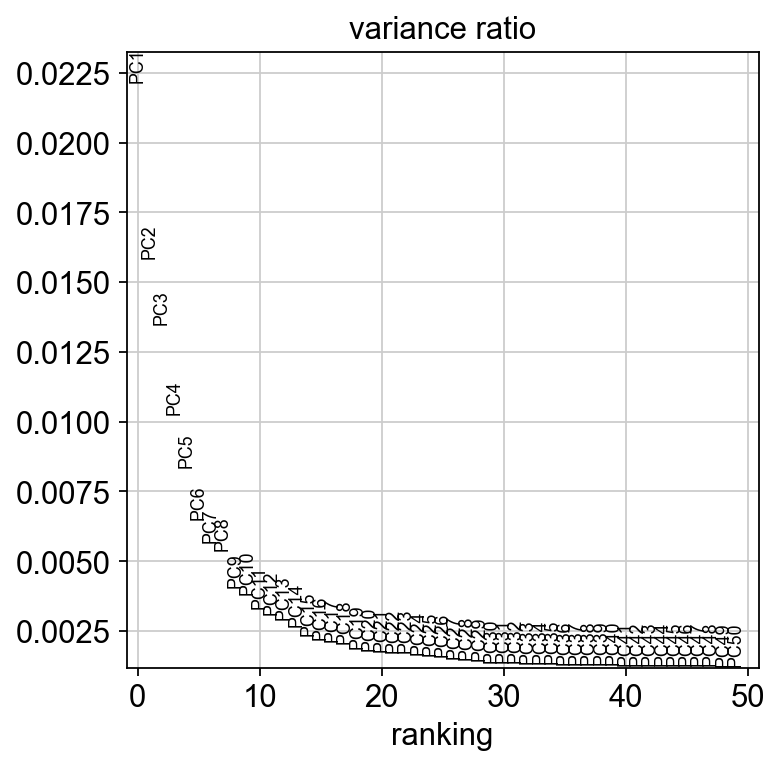

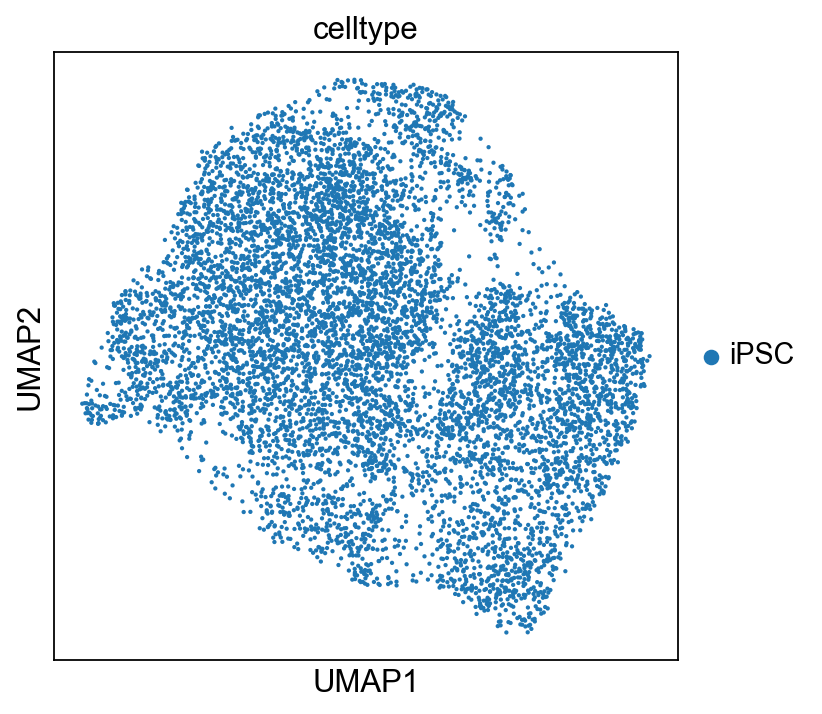

In [67]:
# PCA and KNN for UMAP plots
sc.tl.pca(adata, use_highly_variable=True)
sc.pl.pca_variance_ratio(adata,50)

sc.pp.neighbors(adata,n_neighbors=20,n_pcs=10)
sc.tl.umap(adata)
sc.pl.umap(adata, color='celltype')

In [68]:
# Quick run of InferCNVpy for Leiden clustering by CNV score
reference_key = 'predicted_diploid'
reference_cat = ['diploid']

cnv.tl.infercnv(adata,reference_key=reference_key,reference_cat=reference_cat,
                exclude_chromosomes=None,chunksize=5000,calculate_gene_values=False,
                window_size=100,step=10,dynamic_threshold=1.5)

  0%|          | 0/2 [00:00<?, ?it/s]

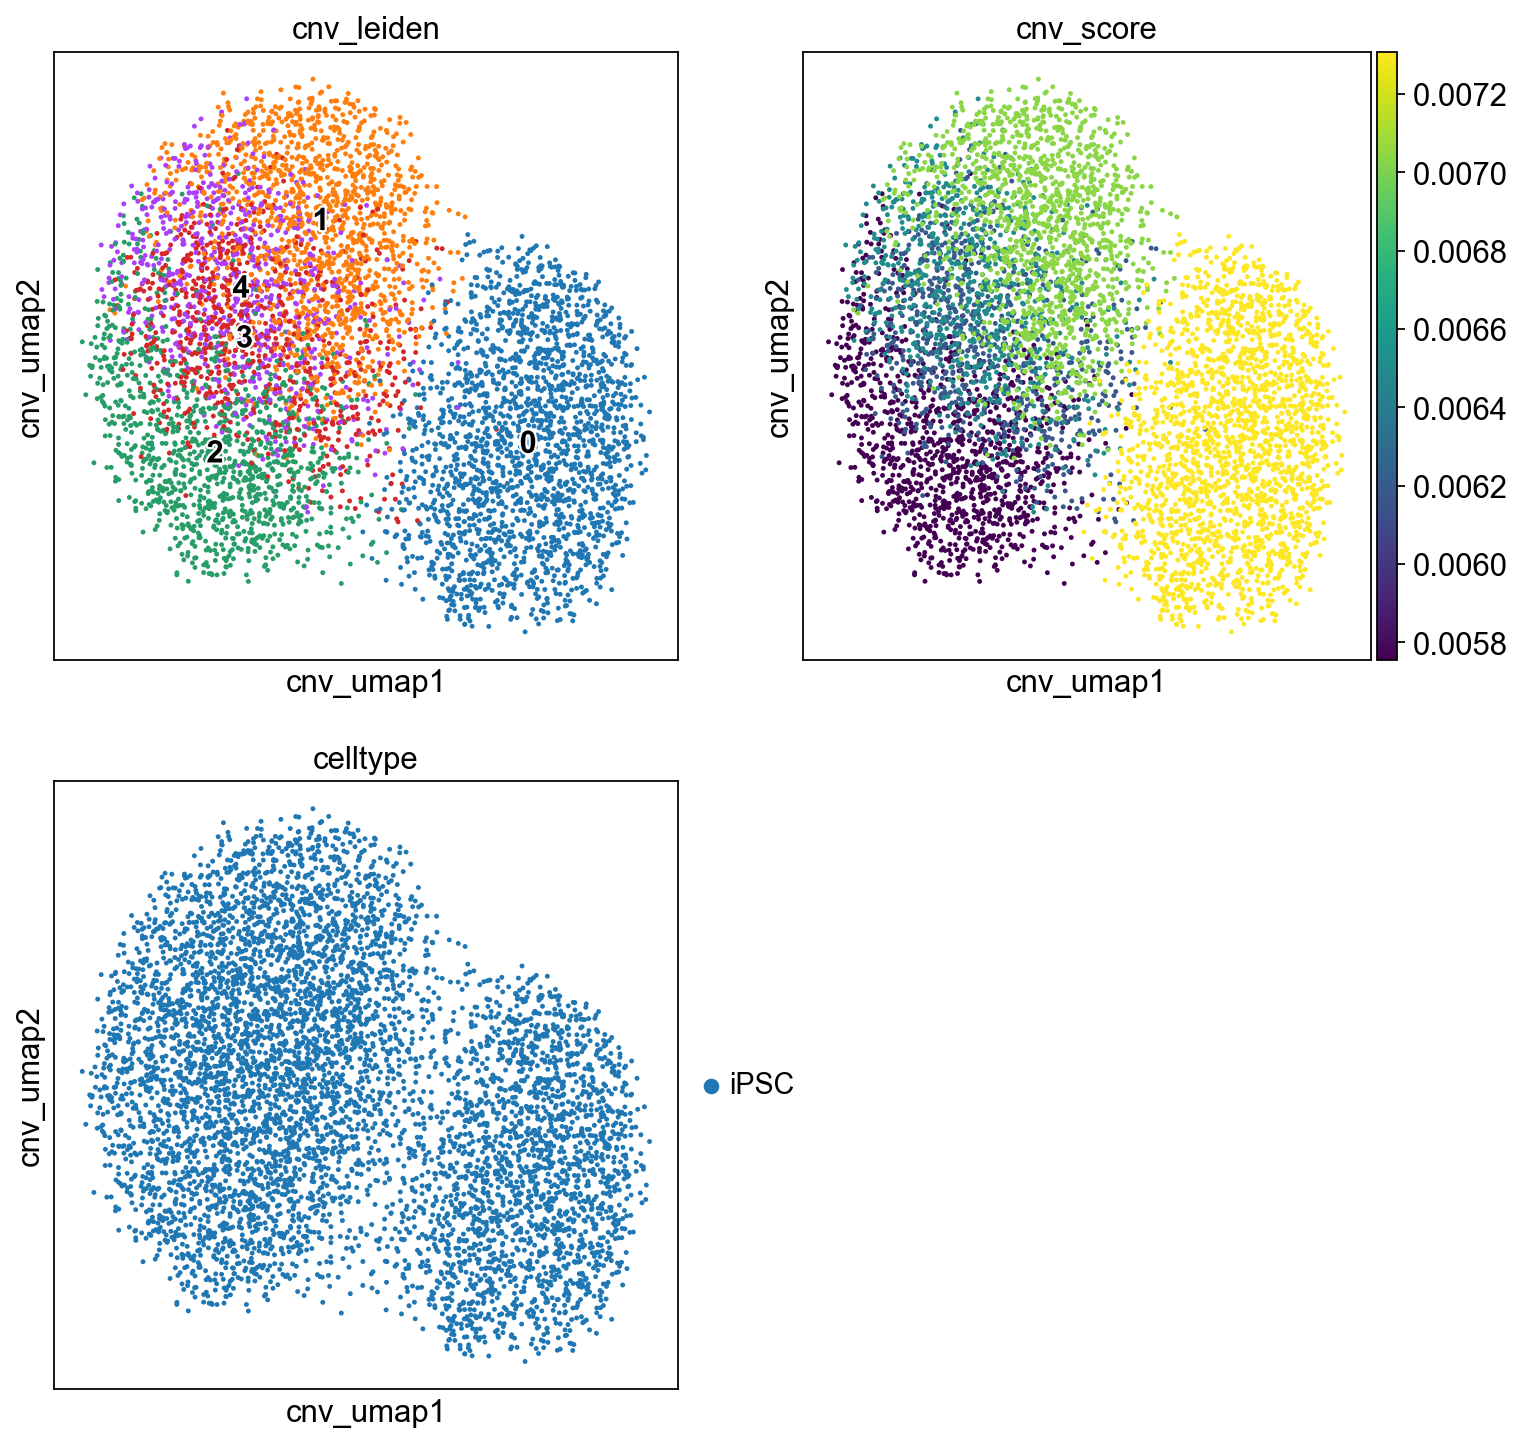

In [70]:
# Plot
def plot_aneuploid_cnv_clusters_new(adata,diploid_annotation='predicted_diploid'):
    adata_aneuploid = adata[adata.obs['predicted_diploid']=='aneuploid']

    cnv.tl.pca(adata_aneuploid)
    cnv.pp.neighbors(adata_aneuploid)
    cnv.tl.leiden(adata_aneuploid)

    sc.tl.dendrogram(adata_aneuploid, groupby='cnv_leiden')

    cnv.tl.umap(adata_aneuploid)
    cnv.tl.cnv_score(adata_aneuploid)


    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 11))
    ax4.axis("off")
    cnv.pl.umap(
        adata_aneuploid,
        color="cnv_leiden",
        legend_loc="on data",
        legend_fontoutline=2,
        ax=ax1,
        show=False,
    )
    cnv.pl.umap(adata_aneuploid, color="cnv_score", ax=ax2, show=False)
    cnv.pl.umap(adata_aneuploid, color="celltype", ax=ax3)
plot_aneuploid_cnv_clusters_new(adata,diploid_annotation='predicted_diploid')

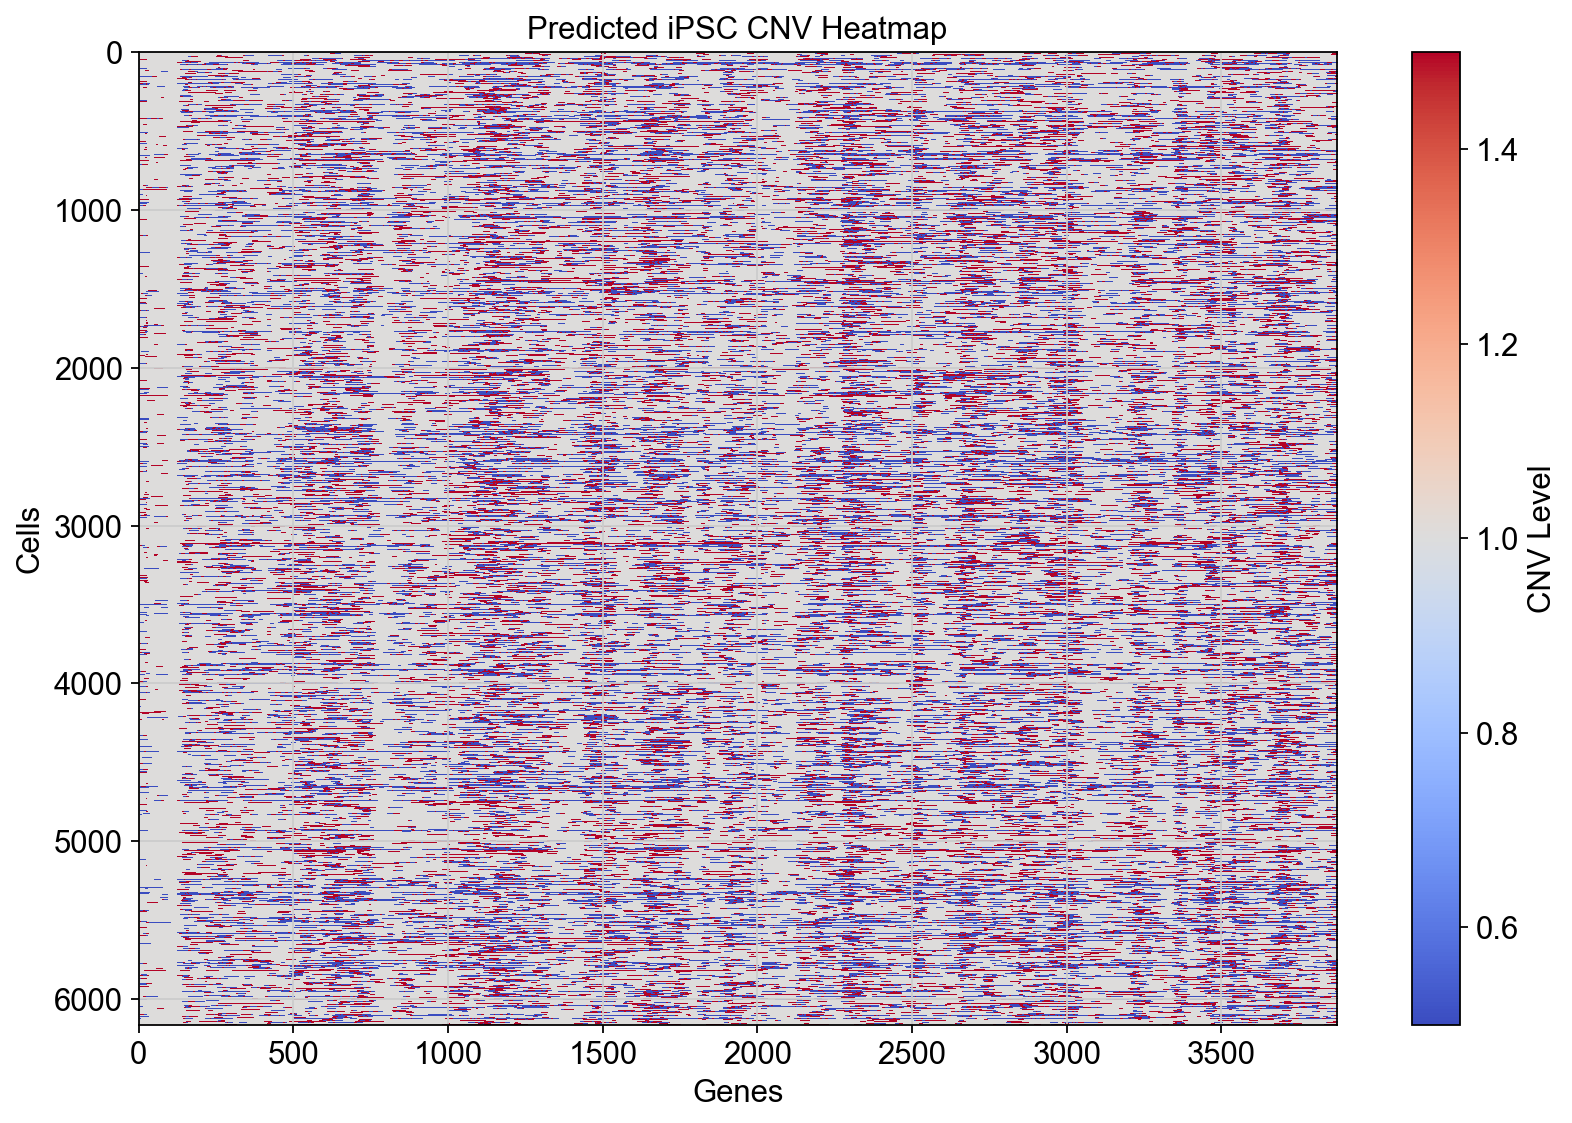

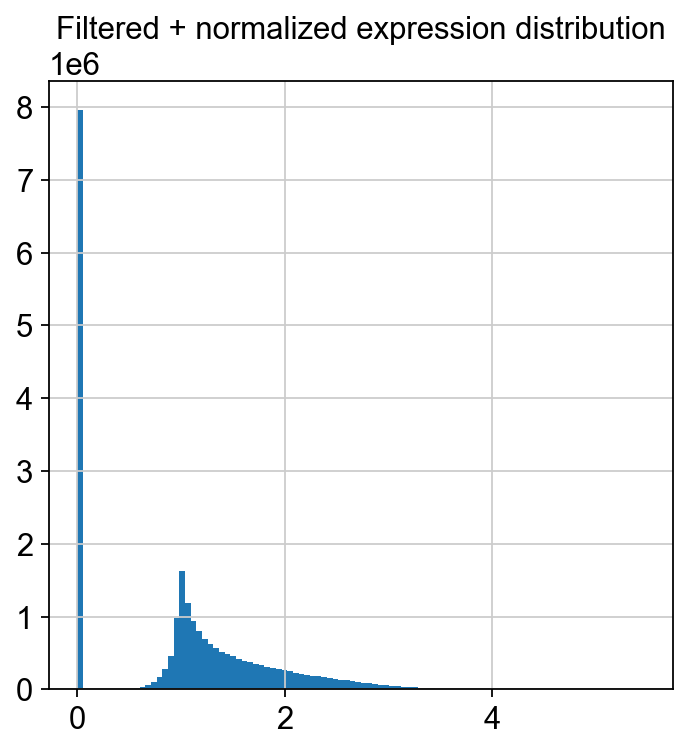

In [72]:
adata_Mono = i3_hmm_infercnv(adata,cell_type='iPSC',cell_annotation='celltype',diploid_annotation='predicted_diploid',logFC_threshold=0.5,plots=True)

In [73]:
adata_Mono.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster,hmm_cnv_score,hmm_cnv
AAACCTGAGAATTGTG-1,2488,11469.0,401.0,3.496382,5000.0,43.595779,2488,11469.0,1,iPSC,aneuploid,2,0.756390,chr17:5471254.0-47624665.0 (loss)
AAACCTGAGACAATAC-1,3559,16891.0,669.0,3.960689,6438.0,38.114975,3559,16891.0,0,iPSC,aneuploid,1,0.981668,
AAACCTGAGACTTTCG-1,5118,32728.0,1597.0,4.879614,12402.0,37.894157,5118,32728.0,1,iPSC,aneuploid,2,1.093338,chrX:155197007.0-155239841.0 (gain)
AAACCTGAGGCGTACA-1,2515,10700.0,476.0,4.448598,4417.0,41.280373,2515,10700.0,1,iPSC,aneuploid,2,0.760909,chrX:155197007.0-155239841.0 (loss)
AAACCTGCACTGAAGG-1,3695,17886.0,599.0,3.348988,6263.0,35.016216,3695,17886.0,0,iPSC,aneuploid,1,1.007230,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCACAGGCC-1,3551,17623.0,699.0,3.966408,6534.0,37.076550,3551,17623.0,0,iPSC,aneuploid,1,0.991867,
TTTGTCATCACCAGGC-1,4944,30810.0,1315.0,4.268095,11820.0,38.364166,4944,30810.0,1,iPSC,aneuploid,2,1.095920,chr1:459656.0-1232031.0 (gain)
TTTGTCATCATGCAAC-1,3500,19690.0,807.0,4.098527,9161.0,46.526154,3500,19690.0,1,iPSC,aneuploid,2,0.943713,chrX:155197007.0-155239841.0 (loss)
TTTGTCATCTCTTGAT-1,3441,16482.0,596.0,3.616066,6164.0,37.398373,3441,16482.0,0,iPSC,aneuploid,1,0.956752,


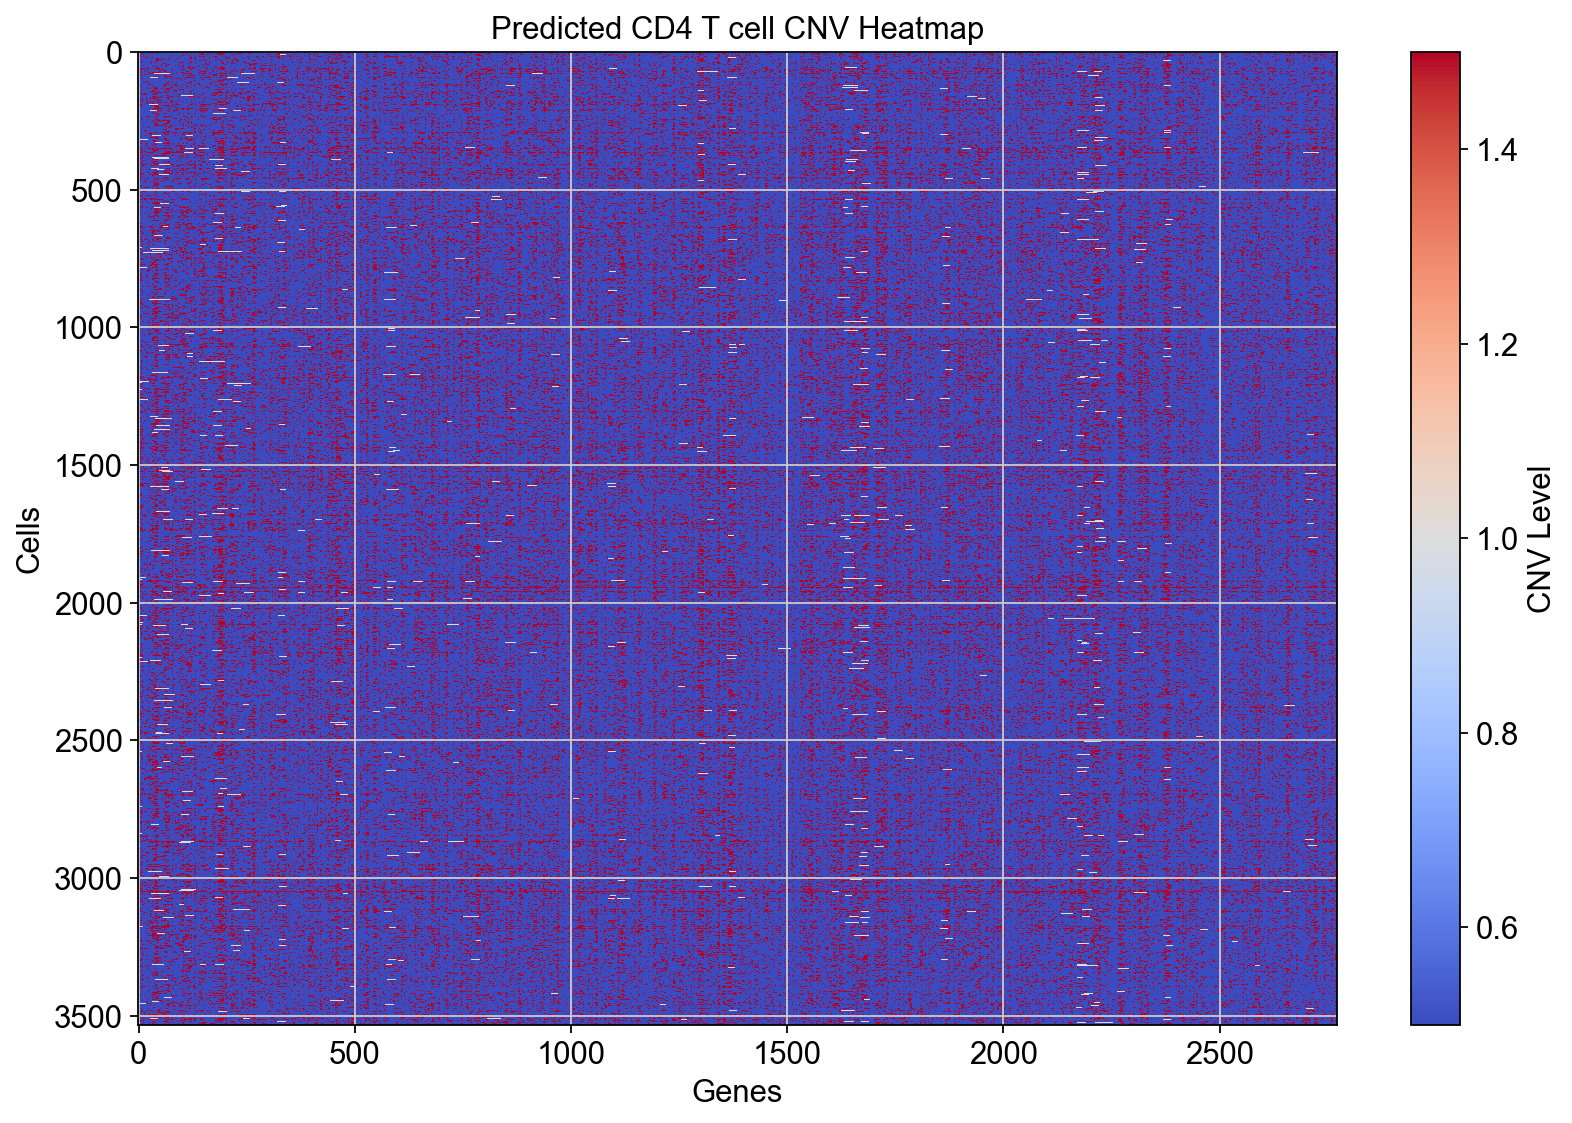

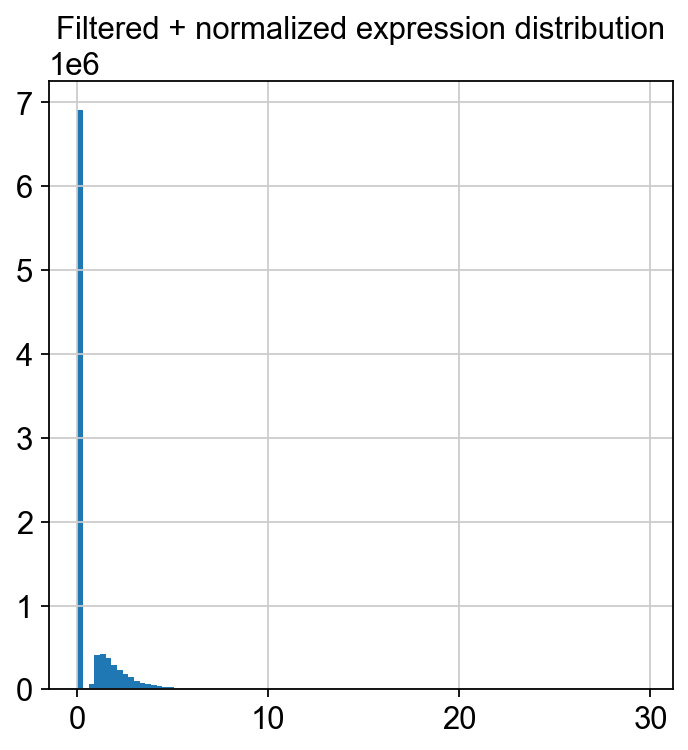

In [27]:
adata_Tcell = i3_hmm_infercnv(adata,cell_type='CD4 T cell',cell_annotation='cell_type',diploid_annotation='predicted_diploid',logFC_threshold=0.5,plots=True)

In [22]:
adata_Tcell.obs

,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt,n_genes,n_counts,cell_type,simulated_cnvs,predicted_diploid,gmm_cluster,hmm_cnv_score,hmm_cnv
AAACCCAAGCGCCCAT-1,1005,1760.0,392.0,17.785845,52.0,2.359347,1005,1760.0,CD4 T cell,,aneuploid,0,0.566402,chr1:1216931.0-108702928.0 (loss)
AAACCCAGTGGCTACC-1,1869,3879.0,2399.0,35.795288,424.0,6.326470,1869,3879.0,CD4 T cell,,aneuploid,0,0.715085,chr1:1216931.0-38024820.0 (loss)
AAACCCATCCCGAGAC-1,1866,4015.0,2532.0,35.702198,545.0,7.684715,1866,4015.0,CD4 T cell,,aneuploid,0,0.708769,chr1:1216931.0-65067754.0 (loss)
AAACCCATCTGGCCGA-1,1604,3033.0,1766.0,32.886406,571.0,10.633146,1604,3033.0,CD4 T cell,,aneuploid,0,0.656622,chr1:1216931.0-94518666.0 (loss)
AAACGAACAATACCCA-1,1747,3476.0,1722.0,29.674307,605.0,10.425642,1747,3476.0,CD4 T cell,,aneuploid,0,0.699747,chr1:1216931.0-30757774.0 (loss)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCTCCACA-1,2272,5065.0,3799.0,40.201057,586.0,6.201058,2272,5065.0,CD4 T cell,X:106533974-112956833 (CN 4),aneuploid,0,0.767412,chr7:73567537.0-149867479.0 (loss)
TTTGTTGCAATAGGGC-1,1839,3748.0,2061.0,32.755882,483.0,7.676414,1839,3748.0,CD4 T cell,X:106533974-112956833 (CN 4),aneuploid,0,0.680801,chr19:2425625.0-17521288.0 (loss)
TTTGTTGGTGCGTCGT-1,1245,2279.0,2471.0,48.308895,365.0,7.135875,1245,2279.0,CD4 T cell,,aneuploid,0,0.599242,chr1:1216931.0-44805995.0 (loss)
TTTGTTGTCCAAGCCG-1,1577,3093.0,1985.0,35.433773,524.0,9.353803,1577,3093.0,CD4 T cell,X:106533974-112956833 (CN 4),aneuploid,0,0.639661,chr1:1216931.0-42703805.0 (loss)


In [74]:
# Update new CNV information back into original adata
adata.obs.loc[adata_Mono.obs_names,'hmm_cnv'] = adata_Mono.obs['hmm_cnv']
#adata.obs.loc[adata_Tcell.obs_names,'hmm_cnv'] = adata_Mono.obs['hmm_cnv']
adata.obs['hmm_cnv'].fillna('', inplace=True)
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster,hmm_cnv
AAACCTGAGAATTGTG-1,2488,11469.0,401.0,3.496382,5000.0,43.595779,2488,11469.0,1,iPSC,aneuploid,2,chr17:5471254.0-47624665.0 (loss)
AAACCTGAGACAATAC-1,3559,16891.0,669.0,3.960689,6438.0,38.114975,3559,16891.0,0,iPSC,aneuploid,1,
AAACCTGAGACTACAA-1,2629,9423.0,377.0,4.000849,3390.0,35.975803,2629,9423.0,0,iPSC,diploid,0,
AAACCTGAGACTTTCG-1,5118,32728.0,1597.0,4.879614,12402.0,37.894157,5118,32728.0,1,iPSC,aneuploid,2,chrX:155197007.0-155239841.0 (gain)
AAACCTGAGGCGTACA-1,2515,10700.0,476.0,4.448598,4417.0,41.280373,2515,10700.0,1,iPSC,aneuploid,2,chrX:155197007.0-155239841.0 (loss)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCATGCAAC-1,3500,19690.0,807.0,4.098527,9161.0,46.526154,3500,19690.0,1,iPSC,aneuploid,2,chrX:155197007.0-155239841.0 (loss)
TTTGTCATCCACTCCA-1,2404,9304.0,433.0,4.653913,3774.0,40.563198,2404,9304.0,0,iPSC,diploid,0,
TTTGTCATCTCTTGAT-1,3441,16482.0,596.0,3.616066,6164.0,37.398373,3441,16482.0,0,iPSC,aneuploid,1,
TTTGTCATCTGTTTGT-1,3065,15306.0,624.0,4.076833,6725.0,43.937019,3065,15306.0,1,iPSC,aneuploid,2,chrX:155197007.0-155239841.0 (loss)


In [76]:
# Print top 5 most frequent CNVs
top_cnvs = adata.obs['hmm_cnv'].value_counts().head(10)
print("Top 10 most common CNVs:")
print(top_cnvs)

Top 10 most common CNVs:
hmm_cnv
                                       4715
chrX:155197007.0-155239841.0 (loss)     644
chrX:155197007.0-155239841.0 (gain)     442
chr1:459656.0-189784048.0 (loss)         17
chr1:459656.0-248224922.0 (loss)         14
chr1:459656.0-188856565.0 (loss)         12
chr1:459656.0-201979481.0 (loss)         10
chr1:459656.0-201979481.0 (gain)         10
chr1:459656.0-23762059.0 (gain)           8
chr1:459656.0-1273864.0 (gain)            8
Name: count, dtype: int64


In [96]:
# Because chromosome location and genomic regions are almost all wrong
# We will focus on whether we were able to detect in a cell a CNV and its type (gain or loss) correctly
assess_predicted_cnvs(adata,prediction_annotation='hmm_cnv',truth_annotation='simulated_cnvs')

Precision: 0.5733788395904437
Recall: 0.27199136535348084
Accuracy: 0.7888548683404777
F1 score: 0.3689604685212299
